In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [3]:
#lat_lngs and cities
lat_lngs = []
cities = []

#random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

In [4]:
#lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | mitu
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | mys shmidta
Processing Record 12 of Set 1 | aswan
Processing Record 13 of Set 1 | wanaka
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | samarinda
City not found. Skipping...
Processing Record 21 of Set 1 | cherepovets
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 1 | khatanga
Proces

City not found. Skipping...
Processing Record 33 of Set 4 | sao joao da barra
Processing Record 34 of Set 4 | leningradskiy
City not found. Skipping...
Processing Record 35 of Set 4 | makakilo city
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4 | zalesovo
Processing Record 37 of Set 4 | sandnessjoen
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | huarmey
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | qostanay
Processing Record 45 of Set 4 | oksfjord
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | plettenberg bay
Processing Record 48 of Set 4 | sur
Processing Record 49 of Set 4 | kralendijk
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set

Processing Record 15 of Set 8 | solrod
Processing Record 16 of Set 8 | tacna
Processing Record 17 of Set 8 | vigia del fuerte
Processing Record 18 of Set 8 | kattivakkam
Processing Record 19 of Set 8 | yishui
Processing Record 20 of Set 8 | nantucket
Processing Record 21 of Set 8 | san pedro de uraba
City not found. Skipping...
Processing Record 22 of Set 8 | hojai
Processing Record 23 of Set 8 | bhatkal
Processing Record 24 of Set 8 | altus
Processing Record 25 of Set 8 | baixa grande
Processing Record 26 of Set 8 | barda
Processing Record 27 of Set 8 | reinheim
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | bijie
Processing Record 31 of Set 8 | sawakin
Processing Record 32 of Set 8 | lucapa
City not found. Skipping...
Processing Record 33 of Set 8 | alexandria
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | odessa
Processing Record 36 of Set 8 | biak
Processing Record 37 of Set 8 | 

In [5]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [6]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,79,ZA,1575858931,68,-34.53,20.04,66.20,13.87
1,vaini,100,IN,1575858931,82,15.34,74.49,68.00,5.82
2,saint-philippe,90,CA,1575858931,64,45.36,-73.48,35.60,19.46
3,ancud,40,CL,1575858931,87,-41.87,-73.83,53.60,5.82
4,bilibino,100,RU,1575858931,99,68.06,166.44,-25.62,4.09


In [7]:

weather_dataframe.count()

City          495
Cloudiness    495
Country       495
Date          495
Humidity      495
Lat           495
Lng           495
Max Temp      495
Wind Speed    495
dtype: int64

In [19]:
weather_dataframe.head()
weather_dataframe.to_csv("weatherhw.csv")

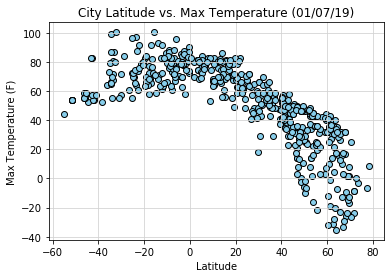

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure1.png")
plt.show()

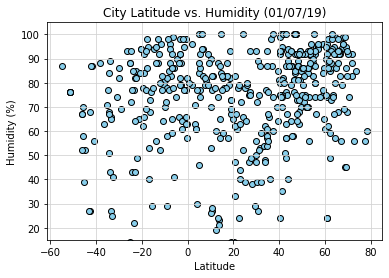

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure2.png")
plt.show()

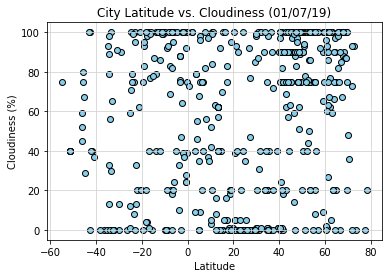

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure3.png")
plt.show()

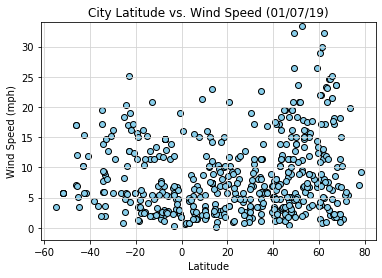

In [14]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure4.png")
plt.show()